# Example 1

The problem to be solved by TwoDuBEM is this first example consists of the following:

$$ \nabla^2 u = 0 \quad \text{for} \quad 0 < x < 1, \quad 0 < y < 1, $$

subjected to the boundary conditions

$$ u = 0 \quad \text{on} \quad x = 0, \quad 0 < y < 1, $$

$$ u = \cos(\pi y) \quad \text{on} \quad x = 1, \quad 0 < y < 1, $$

$$ \frac{\partial u}{\partial n} = 0 \quad \text{on} \quad y = 0 \quad \text{and} \quad y = 1, \quad 0 < x < 1. $$

To validate the numerical results, the analytical solution and its gradient are presented below.

$$ u = \frac{\sinh(\pi x) \cos(\pi y)}{\sinh(\pi)}, $$
$$ \frac{\partial u}{\partial x} = \frac{\pi \cosh(\pi x) \cos(\pi y)}{\sinh(\pi)}, $$
$$ \frac{\partial u}{\partial y} = \frac{-\pi \sinh(\pi x) \sin(\pi y)}{\sinh(\pi)}. $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from twodubem import Boundary, Laplace, Solver

In [2]:
# Analytical expressions.
ua = lambda x, y: np.sinh(np.pi * x) * np.cos(np.pi * y) / np.sinh(np.pi)
uxa = lambda x, y: np.pi * np.cosh(np.pi * x) * np.cos(np.pi * y) / np.sinh(np.pi)
uya = lambda x, y: -np.pi * np.sinh(np.pi * x) * np.sin(np.pi * y) / np.sinh(np.pi)

# Interior points where results will be evaluated and compared.
xv = np.linspace(0.01, 0.99, 99)
yv = np.linspace(0.01, 0.99, 99)
X, Y = np.meshgrid(xv, yv)

# Analytical solution at the inteiror points.
Ua = ua(X, Y)
Uxa = uxa(X, Y)
Uya = uya(X, Y)

In [3]:
# Numerical solution with the Boundary Element Method, using 4 constant elements.
def boundary_condition(side, point):
    x, y = point
    
    if side == 0:
        # Bottom side.
        bc_type = 1
        bc_value = 0.0
    elif side == 1:
        # Right side.
        bc_type = 0
        bc_value = np.cos(np.pi * y)
    elif side == 2:
        # Top side.
        bc_type = 1
        bc_value = 0.0
    elif side == 3:
        # Left side.
        bc_type = 0
        bc_value = 0.0
    else:
        raise ValueError(f'Side value {side} is invalid.')

    return bc_type, bc_value

L = Laplace()
S = Boundary.square([0.0, 0.0], 1.0, 5, boundary_condition)
bem_solution = Solver(S, L, method='constant')
bem_solution.solve()
Z, W = bem_solution.get_solution(X, Y, check_points=False)
Zx = W[:, :, 0]
Zy = W[:, :, 1]

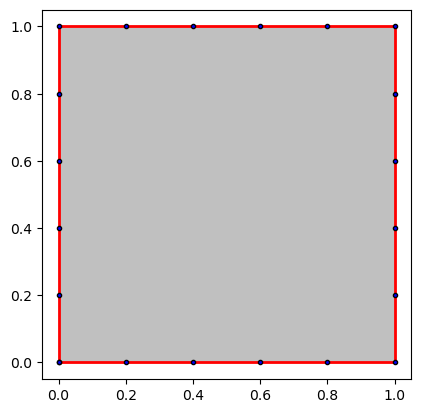

In [4]:
# Graphical representation of the discretized boundary.
S.show()

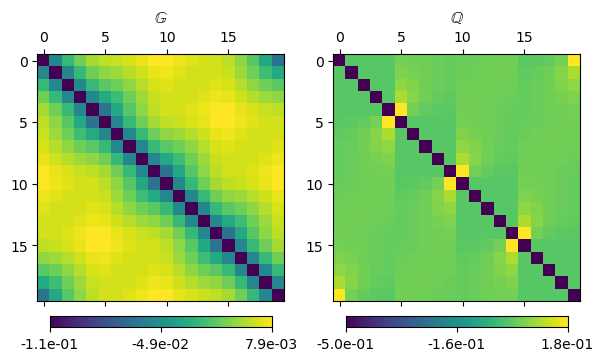

In [5]:
bem_solution.show_influence_matrices()

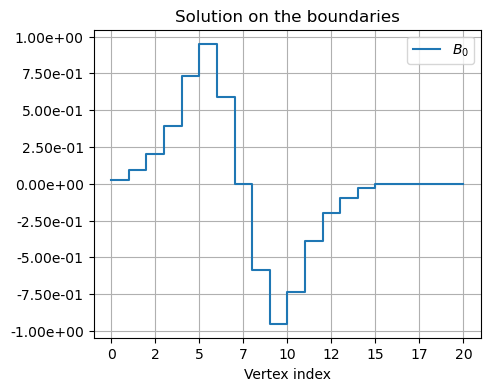

In [6]:
bem_solution.show_boundary_solution()

In [7]:
# Ticks for colorbar
Umin = Ua.min()
Umax = Ua.max()
Uavg = 0.5 * (Umin + Umax)
Uticks = [Umin, Uavg, Umax]

Uxmin = Uxa.min()
Uxmax = Uxa.max()
Uxavg = 0.5 * (Uxmin + Uxmax)
Uxticks = [Uxmin, Uxavg, Uxmax]

Uymin = Uya.min()
Uymax = Uya.max()
Uyavg = 0.5 * (Uymin + Uymax)
Uyticks = [Uymin, Uyavg, Uymax]

Zmin = Z.min()
Zmax = Z.max()
Zavg = 0.5 * (Zmin + Zmax)
Zticks = [Zmin, Zavg, Zmax]

Zxmin = Zx.min()
Zxmax = Zx.max()
Zxavg = 0.5 * (Zxmin + Zxmax)
Zxticks = [Zxmin, Zxavg, Zxmax]

Zymin = Zy.min()
Zymax = Zy.max()
Zyavg = 0.5 * (Zymin + Zymax)
Zyticks = [Zymin, Zyavg, Zymax]

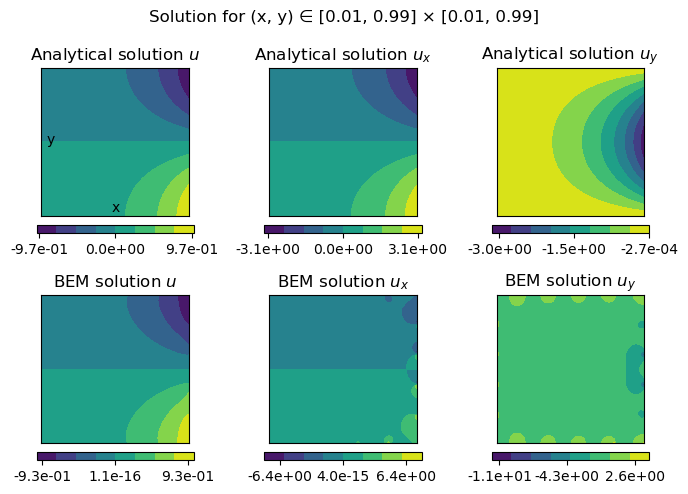

In [8]:
# Plot analytical and numerical solutions.
fig, ax = plt.subplots(2, 3, figsize=(7, 5))

fig.suptitle('Solution for (x, y) ∈ [0.01, 0.99] × [0.01, 0.99]')

ax[0, 0].set_title(r'Analytical solution $u$')
ax[0, 1].set_title(r'Analytical solution $u_x$')
ax[0, 2].set_title(r'Analytical solution $u_y$')

U_ax = ax[0, 0].contourf(X, Y, Ua)
Ux_ax = ax[0, 1].contourf(X, Y, Uxa)
Uy_ax = ax[0, 2].contourf(X, Y, Uya)

ax[1, 0].set_title(r'BEM solution $u$')
ax[1, 1].set_title(r'BEM solution $u_x$')
ax[1, 2].set_title(r'BEM solution $u_y$')

Z_ax = ax[1, 0].contourf(X, Y, Z)
Zx_ax = ax[1, 1].contourf(X, Y, Zx)
Zy_ax = ax[1, 2].contourf(X, Y, Zy)

for x in ax.ravel():
    x.set_aspect('equal')
    x.set_xticks([])
    x.set_yticks([])

ax[0, 0].set_xlabel('x')
ax[0, 0].xaxis.set_label_coords(0.5, 0.1)

ax[0, 0].set_ylabel('y', rotation=0.0)
ax[0, 0].yaxis.set_label_coords(0.06, 0.47)

fig.colorbar(U_ax, ax=ax[0, 0], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Uticks)
fig.colorbar(Ux_ax, ax=ax[0, 1], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Uxticks)
fig.colorbar(Uy_ax, ax=ax[0, 2], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Uyticks)
fig.colorbar(Z_ax, ax=ax[1, 0], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Zticks)
fig.colorbar(Zx_ax, ax=ax[1, 1], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Zxticks)
fig.colorbar(Zy_ax, ax=ax[1, 2], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Zyticks)

fig.tight_layout()
plt.show()

Qualitatively, the plots above indicate a good approximation for $u(x,y)$ using the Boundary Element Method with the `constant` method, but for the gradients $u_x(x,y)$ and $u_y(x,y)$, more elements are necessary, as will be explored in the [convergence study test](#convergence-study-test).

In [9]:
# Numerical error.
Zerr = np.abs(Z - Ua)
Zxerr = np.abs(Zx - Uxa)
Zyerr = np.abs(Zy - Uya)

# Error colorbar ticks.
Zerrmin = Zerr.min()
Zerrmax = Zerr.max()
Zerravg = 0.5 * (Zerrmin + Zerrmax)
Zerrticks = [Zerrmin, Zerravg, Zerrmax]

Zxerrmin = Zxerr.min()
Zxerrmax = Zxerr.max()
Zxerravg = 0.5 * (Zxerrmin + Zxerrmax)
Zxerrticks = [Zxerrmin, Zxerravg, Zxerrmax]

Zyerrmin = Zyerr.min()
Zyerrmax = Zyerr.max()
Zyerravg = 0.5 * (Zyerrmin + Zyerrmax)
Zyerrticks = [Zyerrmin, Zyerravg, Zyerrmax]

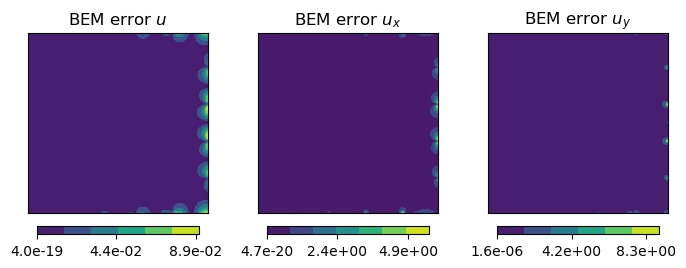

In [10]:
# Plot numerical solution error.
fig, ax = plt.subplots(1, 3, figsize=(7, 3))

ax[0].set_title(r'BEM error $u$')
ax[1].set_title(r'BEM error $u_x$')
ax[2].set_title(r'BEM error $u_y$')

Zerr_ax = ax[0].contourf(X, Y, Zerr)
Zxerr_ax = ax[1].contourf(X, Y, Zxerr)
Zyerr_ax = ax[2].contourf(X, Y, Zyerr)

for x in ax.ravel():
    x.set_aspect('equal')
    x.xaxis.set_visible(False)
    x.yaxis.set_visible(False)

fig.colorbar(Zerr_ax, ax=ax[0], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Zerrticks)
fig.colorbar(Zxerr_ax, ax=ax[1], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Zxerrticks)
fig.colorbar(Zyerr_ax, ax=ax[2], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Zyerrticks)

fig.tight_layout()
plt.show()

It's noticeable from the plots above that the solution gets worse the closer we get to the boundary, specially for the gradients.

The line plots bellow show this behavior in more detail. Notice the singular behavior of the gradients, as we get closer to the boundary element's endpoints.

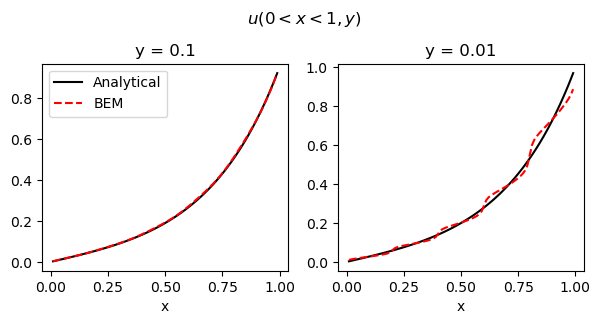

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

plt.subplots_adjust(top=0.8)
fig.suptitle(r'$u(0 < x < 1, y)$')

# Mask for 0.0 < x < 1.0 and y = 0.1.
mask = np.abs(Y - 0.1) < np.finfo(np.float64).eps

xm = X[mask]
um = Ua[mask]
zm = Z[mask]

ax[0].plot(xm, um, '-k', label='Analytical')
ax[0].plot(xm, zm, '--r', label='BEM')
ax[0].set_title('y = 0.1')
ax[0].set_xlabel('x')
ax[0].legend()

# Mask for 0.0 < x < 1.0 and y = 0.01.
mask = np.abs(Y - 0.01) < np.finfo(np.float64).eps

xm = X[mask]
um = Ua[mask]
zm = Z[mask]

ax[1].plot(xm, um, '-k')
ax[1].plot(xm, zm, '--r')
ax[1].set_title('y = 0.01')
ax[1].set_xlabel('x')

plt.show()

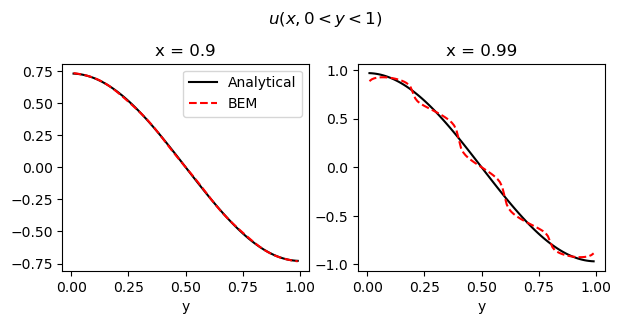

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

plt.subplots_adjust(top=0.8)
fig.suptitle(r'$u(x, 0 < y < 1)$')

# Mask for x = 0.9, 0.0 < y < 1.0.
mask = np.abs(X - 0.9) < np.finfo(np.float64).eps

ym = Y[mask]
um = Ua[mask]
zm = Z[mask]

ax[0].plot(ym, um, '-k', label='Analytical')
ax[0].plot(ym, zm, '--r', label='BEM')
ax[0].set_title('x = 0.9')
ax[0].set_xlabel('y')
ax[0].legend()

# Mask for x = 0.99, 0.0 < y < 1.0.
mask = np.abs(X - 0.99) < np.finfo(np.float64).eps

ym = Y[mask]
um = Ua[mask]
zm = Z[mask]

ax[1].plot(ym, um, '-k')
ax[1].plot(ym, zm, '--r')
ax[1].set_title('x = 0.99')
ax[1].set_xlabel('y')

plt.show()

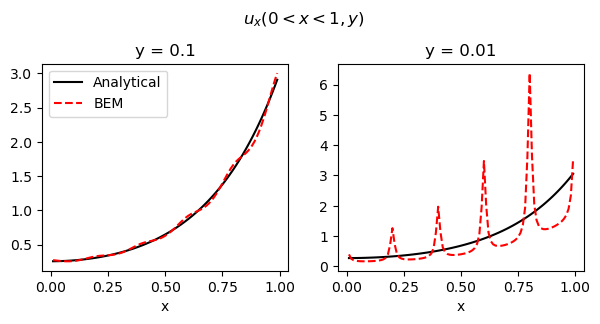

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

plt.subplots_adjust(top=0.8)
fig.suptitle(r'$u_x(0 < x < 1, y)$')

# Mask for 0.0 < x < 1.0 and y = 0.1.
mask = np.abs(Y - 0.1) < np.finfo(np.float64).eps

xm = X[mask]
uxm = Uxa[mask]
zxm = Zx[mask]

ax[0].plot(xm, uxm, '-k', label='Analytical')
ax[0].plot(xm, zxm, '--r', label='BEM')
ax[0].set_title('y = 0.1')
ax[0].set_xlabel('x')
ax[0].legend()

# Mask for 0.0 < x < 1.0 and y = 0.01.
mask = np.abs(Y - 0.01) < np.finfo(np.float64).eps

xm = X[mask]
uxm = Uxa[mask]
zxm = Zx[mask]

ax[1].plot(xm, uxm, '-k')
ax[1].plot(xm, zxm, '--r')
ax[1].set_title('y = 0.01')
ax[1].set_xlabel('x')

plt.show()

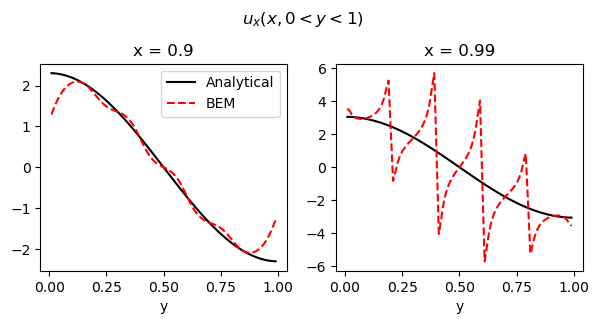

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

plt.subplots_adjust(top=0.8)
fig.suptitle(r'$u_x(x, 0 < y < 1)$')

# Mask for x = 0.9, 0.0 < y < 1.0.
mask = np.abs(X - 0.9) < np.finfo(np.float64).eps

ym = Y[mask]
uxm = Uxa[mask]
zxm = Zx[mask]

ax[0].plot(ym, uxm, '-k', label='Analytical')
ax[0].plot(ym, zxm, '--r', label='BEM')
ax[0].set_title('x = 0.9')
ax[0].set_xlabel('y')
ax[0].legend()

# Mask for x = 0.99 and 0.0 < y < 1.0.
mask = np.abs(X - 0.99) < np.finfo(np.float64).eps

ym = Y[mask]
uxm = Uxa[mask]
zxm = Zx[mask]

ax[1].plot(ym, uxm, '-k')
ax[1].plot(ym, zxm, '--r')
ax[1].set_title('x = 0.99')
ax[1].set_xlabel('y')

plt.show()

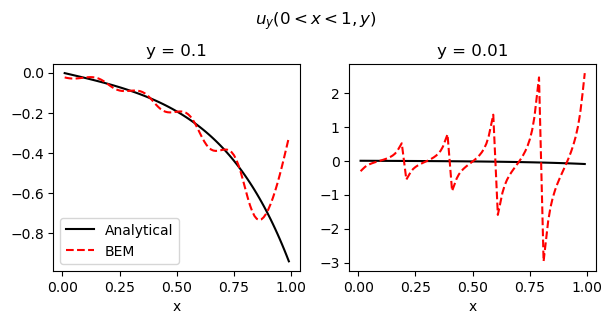

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

plt.subplots_adjust(top=0.8)
fig.suptitle(r'$u_y(0 < x < 1, y)$')

# Mask for 0.0 < x < 1.0 and y = 0.1.
mask = np.abs(Y - 0.1) < np.finfo(np.float64).eps

xm = X[mask]
uym = Uya[mask]
zym = Zy[mask]

ax[0].plot(xm, uym, '-k', label='Analytical')
ax[0].plot(xm, zym, '--r', label='BEM')
ax[0].set_title('y = 0.1')
ax[0].set_xlabel('x')
ax[0].legend()

# Mask for 0.0 < x < 1.0 and y = 0.01.
mask = np.abs(Y - 0.01) < np.finfo(np.float64).eps

xm = X[mask]
uym = Uya[mask]
zym = Zy[mask]

ax[1].plot(xm, uym, '-k')
ax[1].plot(xm, zym, '--r')
ax[1].set_title('y = 0.01')
ax[1].set_xlabel('x')

plt.show()

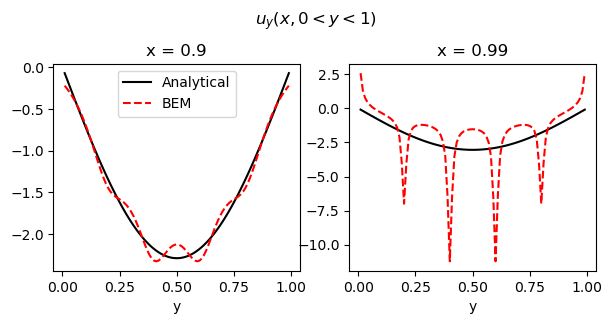

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

plt.subplots_adjust(top=0.8)
fig.suptitle(r'$u_y(x, 0 < y < 1)$')

# Mask for x = 0.9, 0.0 < y < 1.0.
mask = np.abs(X - 0.9) < np.finfo(np.float64).eps

ym = Y[mask]
uym = Uya[mask]
zym = Zy[mask]

ax[0].plot(ym, uym, '-k', label='Analytical')
ax[0].plot(ym, zym, '--r', label='BEM')
ax[0].set_title('x = 0.9')
ax[0].set_xlabel('y')
ax[0].legend()

# Mask for x = 0.99 and 0.0 < y < 1.0.
mask = np.abs(X - 0.99) < np.finfo(np.float64).eps

ym = Y[mask]
uym = Uya[mask]
zym = Zy[mask]

ax[1].plot(ym, uym, '-k')
ax[1].plot(ym, zym, '--r')
ax[1].set_title('x = 0.99')
ax[1].set_xlabel('y')

plt.show()

# Convergence study test

In [44]:
nv = np.array([1, 5, 10, 25, 50, 75, 100, 150, 250], dtype=np.int32)
nt = 4 * nv

Zerr = np.empty(len(nv))
Zxerr = np.empty(len(nv))
Zyerr = np.empty(len(nv))

for i, n in enumerate(nv):
    S = Boundary.square([0.0, 0.0], 1.0, n, boundary_condition)
    bem_solution = Solver(S, L, method='constant')
    bem_solution.solve()
    Z, W = bem_solution.get_solution(X, Y, check_points=False)
    Zx = W[:, :, 0]
    Zy = W[:, :, 1]

    Zerr[i] = np.max(np.abs(Z - Ua))
    Zxerr[i] = np.max(np.abs(Zx - Uxa))
    Zyerr[i] = np.max(np.abs(Zy - Uya))

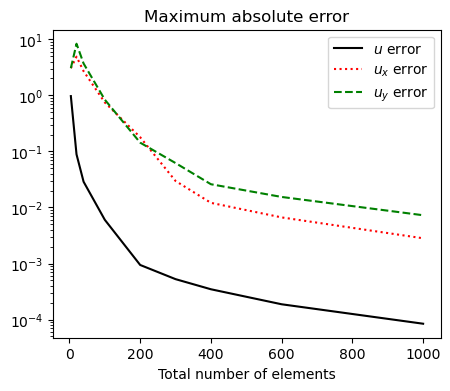

In [66]:
# The convergence study test can take some time, so I save it and load it later.
# np.save('example01_z.npy', Z)
# np.save('example01_zx.npy', Zx)
# np.save('example01_zy.npy', Zy)
# np.save('example01_zerr.npy', Zerr)
# np.save('example01_zxerr.npy', Zxerr)
# np.save('example01_zyerr.npy', Zyerr)

# Z = np.load('example01_z.npy')
# Zx = np.load('example01_zx.npy')
# Zy = np.load('example01_zy.npy')
# Zerr = np.load('example01_zerr.npy')
# Zxerr = np.load('example01_zxerr.npy')
# Zyerr = np.load('example01_zyerr.npy')

fig, ax = plt.subplots(figsize=(5,4))

ax.semilogy(nt, Zerr, '-k', label=r'$u$ error')
ax.semilogy(nt, Zxerr, ':r', label=r'$u_x$ error')
ax.semilogy(nt, Zyerr, '--g', label=r'$u_y$ error')

ax.set_xlabel('Total number of elements')
ax.set_title('Maximum absolute error')

plt.legend()
# plt.savefig('example01_convergence_test.svg', bbox_inches='tight')
plt.show()

In [67]:
# Ticks for colorbar
Umin = Ua.min()
Umax = Ua.max()
Uavg = 0.5 * (Umin + Umax)
Uticks = [Umin, Uavg, Umax]

Uxmin = Uxa.min()
Uxmax = Uxa.max()
Uxavg = 0.5 * (Uxmin + Uxmax)
Uxticks = [Uxmin, Uxavg, Uxmax]

Uymin = Uya.min()
Uymax = Uya.max()
Uyavg = 0.5 * (Uymin + Uymax)
Uyticks = [Uymin, Uyavg, Uymax]

Zmin = Z.min()
Zmax = Z.max()
Zavg = 0.5 * (Zmin + Zmax)
Zticks = [Zmin, Zavg, Zmax]

Zxmin = Zx.min()
Zxmax = Zx.max()
Zxavg = 0.5 * (Zxmin + Zxmax)
Zxticks = [Zxmin, Zxavg, Zxmax]

Zymin = Zy.min()
Zymax = Zy.max()
Zyavg = 0.5 * (Zymin + Zymax)
Zyticks = [Zymin, Zyavg, Zymax]

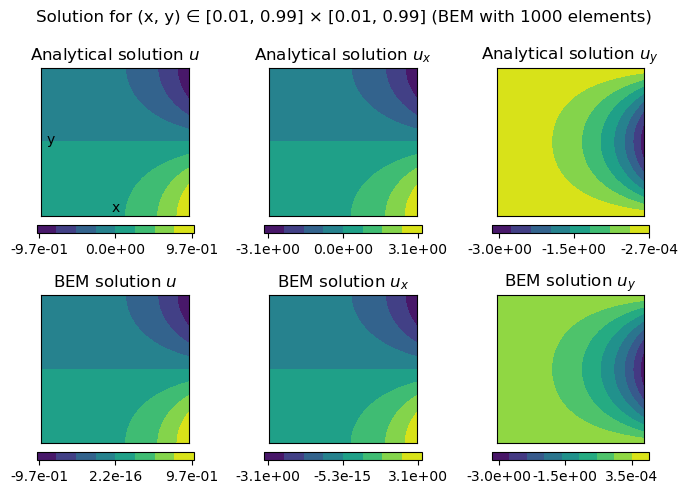

In [68]:
# Plot analytical and numerical solutions for 1000 elements.
fig, ax = plt.subplots(2, 3, figsize=(7, 5))

fig.suptitle('Solution for (x, y) ∈ [0.01, 0.99] × [0.01, 0.99] (BEM with 1000 elements)')

ax[0, 0].set_title(r'Analytical solution $u$')
ax[0, 1].set_title(r'Analytical solution $u_x$')
ax[0, 2].set_title(r'Analytical solution $u_y$')

U_ax = ax[0, 0].contourf(X, Y, Ua)
Ux_ax = ax[0, 1].contourf(X, Y, Uxa)
Uy_ax = ax[0, 2].contourf(X, Y, Uya)

ax[1, 0].set_title(r'BEM solution $u$')
ax[1, 1].set_title(r'BEM solution $u_x$')
ax[1, 2].set_title(r'BEM solution $u_y$')

Z_ax = ax[1, 0].contourf(X, Y, Z)
Zx_ax = ax[1, 1].contourf(X, Y, Zx)
Zy_ax = ax[1, 2].contourf(X, Y, Zy)

for x in ax.ravel():
    x.set_aspect('equal')
    x.set_xticks([])
    x.set_yticks([])

ax[0, 0].set_xlabel('x')
ax[0, 0].xaxis.set_label_coords(0.5, 0.1)

ax[0, 0].set_ylabel('y', rotation=0.0)
ax[0, 0].yaxis.set_label_coords(0.06, 0.47)

fig.colorbar(U_ax, ax=ax[0, 0], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Uticks)
fig.colorbar(Ux_ax, ax=ax[0, 1], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Uxticks)
fig.colorbar(Uy_ax, ax=ax[0, 2], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Uyticks)
fig.colorbar(Z_ax, ax=ax[1, 0], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Zticks)
fig.colorbar(Zx_ax, ax=ax[1, 1], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Zxticks)
fig.colorbar(Zy_ax, ax=ax[1, 2], location='bottom', shrink=0.9, format='%.1e', pad=0.05, ticks=Zyticks)

fig.tight_layout()
# plt.savefig('example01_solution_with_1000_elements.svg', bbox_inches='tight')
plt.show()